In [1]:
import pandas as pd
import plotly.express as px
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
plt.style.use('./mesa.mplstyle10')

In [2]:
d = 'fiducial'
dataMAD = pd.read_csv(f'./data/{d}/MAD/concatenated_file_MAD.csv')
dataNT = pd.read_csv(f'./data/{d}/NTD/concatenated_file_NTD.csv')
datanonrel_MAD = pd.read_csv(f'./data/{d}/Nonrel_MAD/concatenated_file_Nonrel_MAD.csv')
datanonrel_NT = pd.read_csv(f'./data/{d}/Nonrel_NTD/concatenated_file_Nonrel_NTD.csv')
dataMAD.head(2)    

,Mbh,abh,AMexp,Mexp,filename,tff,Md,Mco,Rexp,MHe_form,...,MHe_dep,AMfinal_He_dep,R_He_dep,Omega_mean_He_dep,Omega_mean_exp,Mc12_dep,AM_c12_dep,R_c12_dep,Omega_c12_dep,Eacc
0,4.984,0.1515,3.256000e+49,4.984222,0/LOGS/profile72,970.882882,5.113000e-09,2.970036,1.400817,4.999526,...,4.989663,3.300000e+49,1.453448,0.000259,0.000877,4.984223,3.256000e+49,1.453448,0.000259,8.572000e+47
1,8.938,0.1120,7.782000e+49,8.938068,2/LOGS/profile35,0.000000,0.000000e+00,6.534862,1.206268,8.998252,...,8.955658,7.956000e+49,1.206268,0.000181,0.000785,8.938069,7.782000e+49,1.206268,0.000181,0.000000e+00


###### For spin

In [5]:
def transform_spin(x, y):
    df = pd.DataFrame()
    
    df["x"] = x
    df["y"] = y
    
    df["sqrt(xy)"] = np.sqrt(df['x'] * df['y'])
    df["sqrt(x)"] = np.sqrt(df['x'])
    df["sqrt(y)"] = np.sqrt(df['y'])

    df["xy"] = df['x'] * df['y']
    
    features = ["sqrt(xy)", "sqrt(x)", "sqrt(y)", "xy", "x", "y"]

    return df[features]

In [6]:
def transform_MBH(x, y):
    df = pd.DataFrame()
    
    df["x"] = x
    df["y"] = y
    
    df["sqrt(xy)"] = np.sqrt(df['x'] * df['y'])
    df["sqrt(x)"] = np.sqrt(df['x'])
    df["sqrt(y)"] = np.sqrt(df['y'])

    df["xy"] = df['x'] * df['y']
    
    features = ["sqrt(xy)", "sqrt(x)", "sqrt(y)", "x", "y"]

    return df[features]

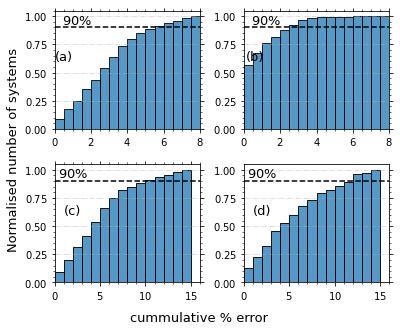

In [7]:
ax = plt.figure(figsize = (6,5.))
gs = GridSpec(2, 2, hspace = 0.3, wspace = 0.3)

# ------------------------------------- NT MBH  -------------------------------------
x = "Mexp"
y = "AMexp"
z = "Mbh"   
msun = 1.989e33
features = ["sqrt(xy)", "sqrt(x)", "sqrt(y)", "x", "y"]
result = []
intercept  = []

plt.subplot(gs[0])
mask = dataNT['abh'] <= 0.9 
df_temp = dataNT[mask].copy()
df_temp[y] = (df_temp['AMexp'] / df_temp['Mexp'] / msun / 1e14).astype(float)

df_temp["sqrt(xy)"] = np.sqrt(df_temp[x] * df_temp[y])
df_temp["sqrt(x)"] = np.sqrt(df_temp[x])
df_temp["sqrt(y)"] = np.sqrt(df_temp[y])
df_temp["x"] = df_temp[x]
df_temp["y"] = df_temp[y]

model_linear = Ridge()
model_linear.fit(df_temp[features], df_temp[z])
model_linear.predict(transform_MBH(df_temp[x], df_temp[y]))
result.append(list(zip(features,model_linear.coef_)))
intercept.append(model_linear.intercept_)

# prediction = model_linear.predict(transform_MBH(df_temp[x], df_temp[y]))
# error = prediction - df_temp[z]

# ax = sns.histplot((error/df_temp[z] * 100).abs(), binrange=[0, 8], binwidth=.5, stat="probability",\
#             element="bars", cumulative=True)
# ax.set(xlabel="", ylabel="", title="")
# plt.grid(axis='y', linestyle = '-.', alpha = 0.5)
# plt.text(-0.01, .65, '(a)')
# plt.text(-0.1, .875, '$90 \% \\longrightarrow$')

# -------------------------------------

mask = dataNT['abh'] > 0.9  
df_temp = dataNT[mask].copy()
df_temp[y] = (df_temp['AMexp'] / df_temp['Mexp'] / msun / 1e14).astype(float)

df_temp["sqrt(xy)"] = np.sqrt(df_temp[x] * df_temp[y])
df_temp["sqrt(x)"] = np.sqrt(df_temp[x])
df_temp["sqrt(y)"] = np.sqrt(df_temp[y])
df_temp["x"] = df_temp[x]
df_temp["y"] = df_temp[y]


model_linear = Ridge()
model_linear.fit(df_temp[features], df_temp[z])
prediction = model_linear.predict(transform_MBH(df_temp[x], df_temp[y]))
result.append(list(zip(features,model_linear.coef_)))
intercept.append(model_linear.intercept_)

error = prediction - df_temp[z]

ax = sns.histplot((error/df_temp[z] * 100).abs(), binrange=[0, 8], binwidth=.5, stat="probability",\
            element="bars", cumulative=True)
ax.set(xlabel="", ylabel="", title="")
plt.grid(axis='y', linestyle = '-.', alpha = 0.5)
plt.text(0.01, .6, '(a)')

plt.plot([0, 20], [0.9, 0.9], linestyle = '--', color = 'k')
plt.text(0.4, .925, '$90 \%$')
plt.xlim(0,8)


#--------------------------------------- MAD MBH ----------------------------------
plt.subplot(gs[1])
mask = dataMAD['abh'] >= 0.12
df_temp = dataMAD[mask].copy()
df_temp[y] = (df_temp['AMexp'] / df_temp['Mexp'] / msun / 1e14).astype(float)

df_temp["sqrt(xy)"] = np.sqrt(df_temp[x] * df_temp[y])
df_temp["sqrt(x)"] = np.sqrt(df_temp[x])
df_temp["sqrt(y)"] = np.sqrt(df_temp[y])
df_temp["x"] = df_temp[x]
df_temp["y"] = df_temp[y]

model_linear = Ridge()
model_linear.fit(df_temp[features], df_temp[z])
prediction = model_linear.predict(transform_MBH(df_temp[x], df_temp[y]))
error = prediction - df_temp[z]

ax = sns.histplot((error/df_temp[z] * 100).abs(), binrange=[0, 8], binwidth=0.5, stat="probability",\
            element="bars", cumulative=True)
ax.set(xlabel="", ylabel="")   #                  Normalised % of system", title="")
plt.grid(axis='y', linestyle = '-.', alpha = 0.5)
result.append(list(zip(features,model_linear.coef_)))
intercept.append(model_linear.intercept_)

# -------------------------------------

mask = dataMAD['abh'] < 0.12
df_temp = dataMAD[mask].copy()
df_temp[y] = (df_temp['AMexp'] / df_temp['Mexp'] / msun / 1e14).astype(float)

df_temp["sqrt(xy)"] = np.sqrt(df_temp[x] * df_temp[y])
df_temp["sqrt(x)"] = np.sqrt(df_temp[x])
df_temp["sqrt(y)"] = np.sqrt(df_temp[y])
df_temp["x"] = df_temp[x]
df_temp["y"] = df_temp[y]

model_linear = Ridge()
model_linear = Ridge()
model_linear.fit(df_temp[features], df_temp[z])
prediction = model_linear.predict(transform_MBH(df_temp[x], df_temp[y]))
result.append(list(zip(features,model_linear.coef_)))
intercept.append(model_linear.intercept_)

plt.text(0.1, .6, '(b)')
plt.plot([0, 20], [0.9, 0.9], linestyle = '--', color = 'k')
plt.text(0.4, .925, '$90 \%$')
plt.xlim(0,8)


# --------------------------------  NT spin ----------------------------------------
x = "Mexp"
y = "AMexp"
z = "abh"
msun = 1.989e33
features = ["sqrt(xy)", "sqrt(x)", "sqrt(y)", "xy", "x", "y"]
# result = []

plt.subplot(gs[2])
mask = dataNT['abh'] <= 0.9
df_temp = dataNT[mask].copy()
df_temp[y] = (dataNT['AMexp'] / dataNT['Mexp'] / msun / 1e14).astype(float)

df_temp["sqrt(xy)"] = np.sqrt(df_temp[x] * df_temp[y])
df_temp["sqrt(x)"] = np.sqrt(df_temp[x])
df_temp["sqrt(y)"] = np.sqrt(df_temp[y])

df_temp["xy"] = df_temp[x] * df_temp[y]
df_temp["x"] = df_temp[x]
df_temp["y"] = df_temp[y]

model_linear = Ridge()
model_linear.fit(df_temp[features], df_temp[z])
prediction = model_linear.predict(transform_spin(df_temp[x], df_temp[y]))
error = prediction- df_temp[z]

ax = sns.histplot((error/df_temp[z] * 100).abs(), binrange=[0, 15], binwidth=1, stat="probability",\
            element="bars", cumulative=True)
ax.set(xlabel="", ylabel="", title="")
plt.grid(axis='y', linestyle = '-.', alpha = 0.5)
/
result.append(list(zip(features,model_linear.coef_)))
intercept.append(model_linear.intercept_)

plt.text(1, .6, '(c)')
plt.plot([0, 20], [0.9, 0.9], linestyle = '--', color = 'k')
plt.text(0.4, .925, '$90 \%$')
plt.xlim(0,16)

# -------------------------------------

mask = dataNT['abh'] > 0.9
df_temp = dataNT[mask].copy()
df_temp[y] = (dataNT['AMexp'] / dataNT['Mexp'] / msun / 1e14).astype(float)

df_temp["sqrt(xy)"] = np.sqrt(df_temp[x] * df_temp[y])
df_temp["sqrt(x)"] = np.sqrt(df_temp[x])
df_temp["sqrt(y)"] = np.sqrt(df_temp[y])

df_temp["xy"] = df_temp[x] * df_temp[y]
df_temp["x"] = df_temp[x]
df_temp["y"] = df_temp[y]

model_linear = Ridge()
model_linear.fit(df_temp[features], df_temp[z])
prediction = model_linear.predict(transform_spin(df_temp[x], df_temp[y]))
result.append(list(zip(features,model_linear.coef_)))
intercept.append(model_linear.intercept_)

# ---------------------------------  MAD spin ----------------------------

plt.subplot(gs[3])
mask = dataMAD['abh'] >= 0.12
df_temp = dataMAD[mask].copy()
df_temp[y] = (df_temp['AMexp'] / df_temp['Mexp'] / msun / 1e14).astype(float)

df_temp["sqrt(xy)"] = np.sqrt(df_temp[x] * df_temp[y])
df_temp["sqrt(x)"] = np.sqrt(df_temp[x])
df_temp["sqrt(y)"] = np.sqrt(df_temp[y])
df_temp["xy"] = df_temp[x] * df_temp[y]
df_temp["x"] = df_temp[x]
df_temp["y"] = df_temp[y]

model_linear = Ridge()
model_linear.fit(df_temp[features], df_temp[z])
prediction = model_linear.predict(transform_spin(df_temp[x], df_temp[y]))

#  removing smaller values for estimating error. 
mask = prediction >= 0.1  # No values are smaller than this in the data
error = prediction[mask]- df_temp[mask][z]

ax = sns.histplot((error/df_temp[mask][z] * 100), binrange=[0, 15], binwidth=1, stat="probability",\
            element="bars", cumulative=True)
ax.set(xlabel="", ylabel="")#                  Normalised % of system",\
#                                                     title="")
plt.grid(axis='y', linestyle = '-.', alpha = 0.5)
plt.text(1, .6, '(d)')
plt.plot([0, 20], [0.9, 0.9], linestyle = '--', color = 'k')
plt.text(0.4, .925, '$90 \%$')
plt.xlim(0,16)

result.append(list(zip(features,model_linear.coef_)))
intercept.append(model_linear.intercept_)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
    top=False)        # ticks along the top edge are off


plt.text(-12.5, -.35, 'cummulative % error')
plt.text(-26, .3, 'Normalised number of systems', rotation = 90)
plt.savefig('./figures/2D_hist_MBH_spinBH_error.png')


#### Fitting parameters ----- Result contains the coefficient and intercepts  --------

### NTD BH 

In [52]:
result[0]  #a <= 0.9

[('sqrt(xy)', 0.017962608699467128),
 ('sqrt(x)', -0.06956738595501259),
 ('sqrt(y)', -0.043292120510240215),
 ('x', 0.9892296055696254),
 ('y', -0.0024704313395228707)]

In [11]:
intercept[0]

0.44947862234416647

In [12]:
result[1]  # a >.9

[('sqrt(xy)', 0.33328788939999854),
 ('sqrt(x)', 1.4346889521430803),
 ('sqrt(y)', -1.9925838484350764),
 ('x', -0.4615551596177556),
 ('y', -0.015464895060977127)]

In [13]:
intercept[1]

55.237175731620894

### MAD BH

In [14]:
result[2]  #a >= 0.12

[('sqrt(xy)', 0.039951564572248174),
 ('sqrt(x)', -0.5173327270809824),
 ('sqrt(y)', 0.0034147797154017927),
 ('x', 0.980389908901624),
 ('y', -0.005918008190179139)]

In [15]:
intercept[2]

1.2198881749857229

In [16]:
result[3]  # a < 0.12

[('sqrt(xy)', 0.05528385478713403),
 ('sqrt(x)', 1.0804216109417726),
 ('sqrt(y)', 0.9192426861985369),
 ('x', 0.8336196723479153),
 ('y', -0.030286814897360147)]

In [17]:
intercept[3]

-8.505592421372462

### NTD spin

In [18]:
result[4]  # a <= 0.9

[('sqrt(xy)', -0.0019613002925420826),
 ('sqrt(x)', 0.06813450091573615),
 ('sqrt(y)', 0.02459914190692738),
 ('xy', -2.0344066330450573e-06),
 ('x', -0.006308675339391202),
 ('y', 0.0002950477061476109)]

In [19]:
intercept[4]

-0.22194982580576716

In [20]:
result[5]  # a> 0.9

[('sqrt(xy)', -0.001967560971313799),
 ('sqrt(x)', 0.0018707710717171106),
 ('sqrt(y)', 0.048384797436727106),
 ('xy', 1.0935981699405325e-06),
 ('x', 0.0039012527092929157),
 ('y', -0.00041135549916064627)]

In [21]:
intercept[5]

-0.0426862173479331

### MAD spin

In [22]:
result[6]

[('sqrt(xy)', 0.0031966336109676033),
 ('sqrt(x)', 0.1216472707758888),
 ('sqrt(y)', 0.020167409280712097),
 ('xy', 2.0863219312743924e-06),
 ('x', -0.022713037129235458),
 ('y', -0.0005473791722611787)]

In [23]:
intercept[6]

-0.17712175849963724

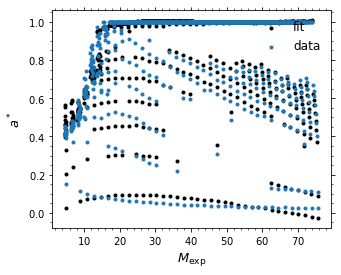

In [13]:
## ------- comparing the fits with actual data / the below shows NTD but MAD can be tested similarly --------

x = "Mexp"
y = "AMexp"
z = "abh"   # This changes
msun = 1.989e33

temp = result[5]
temp1 = intercept[5]

mask = dataNT['abh'] > 0.9  # no use
df_temp = dataNT[mask].copy()
df_temp[y] = (df_temp['AMexp'] / df_temp['Mexp'] / msun / 1e14).astype(float)

MBH1 = temp[0][1]*np.sqrt(df_temp[x]*df_temp[y]) \
    + temp[1][1]*np.sqrt(df_temp[x]) + temp[2][1]*np.sqrt(df_temp[y]) \
    + temp[3][1]*(df_temp[x]*df_temp[y]) \
    + temp[4][1]*(df_temp[x]) + temp[5][1]*(df_temp[y]) + temp1

# plt.plot(df_temp[x], MBH)
plt.scatter(df_temp[x], MBH1, color = 'k', label = 'fit')


temp = result[4]
temp1 = intercept[4]

mask = dataNT['abh'] <= 0.9 
df_temp = dataNT[mask].copy()
df_temp[y] = (df_temp['AMexp'] / df_temp['Mexp'] / msun / 1e14).astype(float)

MBH1 = temp[0][1]*np.sqrt(df_temp[x]*df_temp[y]) \
    + temp[1][1]*np.sqrt(df_temp[x]) + temp[2][1]*np.sqrt(df_temp[y]) \
    + temp[3][1]*(df_temp[x]*df_temp[y]) \
    + temp[4][1]*(df_temp[x]) + temp[5][1]*(df_temp[y]) + temp1

# plt.plot(df_temp[x], MBH)
plt.scatter(df_temp[x], MBH1, color = 'k')
plt.xlabel('$M_{\\rm exp}$')
plt.ylabel('$a^*$')


# temp = result[6]
# temp1 = intercept[6]
# mask = dataMAD['abh'] < 0.12  # no use
# df_temp = dataMAD[mask].copy()
# df_temp[y] = (df_temp['AMexp'] / df_temp['Mexp'] / msun / 1e14).astype(float)

# MBH1 = temp[0][1]*np.sqrt(df_temp[x]*df_temp[y]) \
#     + temp[1][1]*np.sqrt(df_temp[x]) + temp[2][1]*np.sqrt(df_temp[y]) \
#     + temp[3][1]*(df_temp[x]*df_temp[y]) \
#     + temp[4][1]*(df_temp[x]) + temp[5][1]*(df_temp[y]) + temp1

# plt.plot(df_temp[x], MBH)
# plt.scatter(df_temp[x], MBH1)



plt.scatter(dataNT['Mexp'], dataNT['abh'], label = 'data')
plt.legend(loc = 'upper right', ncol = 1)

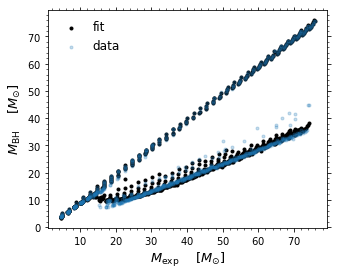

In [16]:
## ------- comparing the fits with actual data / the below shows NTD but MAD can be tested similarly --------

x = "Mexp"
y = "AMexp"
z = "abh"   # This changes
msun = 1.989e33

temp = result[0]
temp1 = intercept[0]

mask = dataNT['abh'] <= 0.9  # no use
df_temp = dataNT[mask].copy()
df_temp[y] = (df_temp['AMexp'] / df_temp['Mexp'] / msun / 1e14).astype(float)

MBH1 = temp[0][1]*np.sqrt(df_temp[x] * df_temp[y]) \
    + temp[1][1]*np.sqrt(df_temp[x]) \
    + temp[2][1]*np.sqrt(df_temp[y]) \
    + temp[3][1]*df_temp[x] \
    + temp[4][1]*df_temp[y] + temp1

# plt.plot(df_temp[x], MBH)
plt.scatter(df_temp[x], MBH1, color = 'k', label = 'fit')


temp = result[1]
temp1 = intercept[1]

mask = dataNT['abh'] > 0.9  # no use
df_temp = dataNT[mask].copy()
df_temp[y] = (df_temp['AMexp'] / df_temp['Mexp'] / msun / 1e14).astype(float)

MBH1 = temp[0][1]*np.sqrt(df_temp[x] * df_temp[y]) \
    + temp[1][1]*np.sqrt(df_temp[x]) \
    + temp[2][1]*np.sqrt(df_temp[y]) \
    + temp[3][1]*df_temp[x] \
    + temp[4][1]*df_temp[y] + temp1

# plt.plot(df_temp[x], MBH)
plt.scatter(df_temp[x], MBH1, color = 'k')
plt.xlabel('$M_{\\rm exp} \\quad$ [$M_{\\odot}$]')
plt.ylabel('$M_{\\rm BH} \\quad$ [$M_{\\odot}$]')


# temp = result[6]
# temp1 = intercept[6]
# mask = dataMAD['abh'] < 0.01  # no use
# df_temp = dataMAD[mask].copy()
# df_temp[y] = (df_temp['AMexp'] / df_temp['Mexp'] / msun / 1e14).astype(float)

# MBH1 = temp[0][1]*np.sqrt(df_temp[x]*df_temp[y]) \
#     + temp[1][1]*np.sqrt(df_temp[x]) + temp[2][1]*np.sqrt(df_temp[y]) \
#     + temp[3][1]*(df_temp[x]*df_temp[y]) \
#     + temp[4][1]*(df_temp[x]) + temp[5][1]*(df_temp[y]) + temp1

# plt.plot(df_temp[x], MBH)
# plt.scatter(df_temp[x], MBH1)

plt.scatter(dataNT['Mexp'], dataNT['Mbh'], alpha = 0.25 , label = 'data')
plt.legend(loc = 'upper left')